In [2]:
import numpy as np
import gym
import random
import time
from custom_env import CustomGridWorldEnv
from IPython.display import clear_output
import copy
import matplotlib.pyplot as plt

In [3]:
env = CustomGridWorldEnv(grid_size=5, num_obstacles=5, num_rewards=5, max_steps=50)
env_copy = copy.deepcopy(env)

action_space_size = env.action_space.n
state_space_size = env.observation_space.n

In [4]:
# Initialize parameters
q_table = np.zeros((state_space_size, action_space_size))
num_episodes = 10000
max_steps_per_episode = 50 
learning_rate = 0.1
discount_rate = 0.99
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.001

rewards_all_episodes = []

In [5]:
for episode in range(num_episodes):
    # Initialize new episode params
    state = env.reset()
    done = False
    rewards_current_episode = 0

    for step in range(max_steps_per_episode):
        # Exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            # Exploit
            action = np.argmax(q_table[state])
        else:
            # Explore
            action = env.action_space.sample()

        # Take a new action
        new_state, reward, done = env.step(action)

        # Update Q-table for Q(s,a)
        q_table[state][action] = q_table[state][action] * (1 - learning_rate) + learning_rate * (reward + discount_rate * np.max(q_table[new_state]))

        # Transition to new state
        state = new_state
        rewards_current_episode += reward
        if done:
            break

    # Exploration rate decay
    exploration_rate = min_exploration_rate + \
        (max_exploration_rate - min_exploration_rate) * \
        np.exp(-exploration_decay_rate * episode)

    rewards_all_episodes.append(rewards_current_episode)

In [6]:
# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)
avg_rewards_per_thousand_episodes = []
count = 1000

print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    avg_reward = sum(r/1000)
    print(count, ": ", str(avg_reward))
    avg_rewards_per_thousand_episodes.append(avg_reward)
    count += 1000

********Average reward per thousand episodes********

1000 :  -4.708999999999989
2000 :  -0.14799999999999996
3000 :  1.0760000000000003
4000 :  1.1809999999999983
5000 :  1.365999999999996
6000 :  1.0400000000000003
7000 :  0.8000000000000006
8000 :  0.6910000000000007
9000 :  0.5410000000000005
10000 :  0.11900000000000036


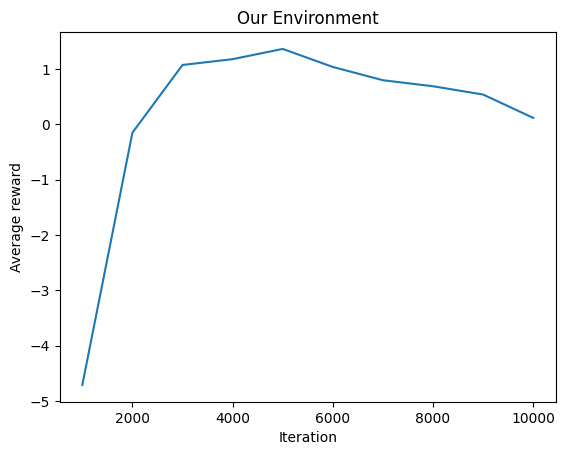

In [7]:
plt.plot(np.arange(1000, 10001, 1000), avg_rewards_per_thousand_episodes)
plt.title("Our Environment")
plt.xlabel("Iteration")
plt.ylabel("Average reward")
plt.show()

In [8]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[-0.47368005 -0.46160252 -0.46645027  0.63291433]
 [-0.60570068  0.55911977 -0.53348502 -0.42792265]
 [-0.44729027 -0.10132351 -0.25125843 -0.28371785]
 [-0.25726998 -0.2048013  -0.26664338 -0.23990177]
 [-0.53872893 -0.47772068 -0.42803682 -0.46095152]
 [ 0.77667838 -0.14814557 -0.32218524 -0.1872599 ]
 [-0.15903231 -0.1520389  -0.23209489 -0.05744796]
 [-0.26832456 -0.27104219 -0.05980232 -0.23687849]
 [-0.29665303 -0.29073365 -0.18628733 -0.35364293]
 [-0.59108425 -0.55799975 -0.20672246 -0.57444555]
 [ 0.02698672 -0.46022084 -0.47954053 -0.4712963 ]
 [-0.28109435 -0.28815108 -0.14245851 -0.27663058]
 [-0.43412751 -0.01034481 -0.44372732 -0.46080618]
 [ 0.10299182 -0.04048315 -0.26584347 -0.2741392 ]
 [-0.52981717 -0.469633   -0.10193418 -0.50705575]
 [-0.59595187 -0.50606164 -0.6058784  -0.54057303]
 [-0.59834524 -0.65058966 -0.64938098 -0.53459583]
 [-0.41703664 -0.17001018 -0.44292831 -0.39581309]
 [-0.31016306 -0.34522063 -0.27315903  0.08332878]
 [ 0